# Berechnung der kritischen Konzentration c

In [1]:
import pandas as pd 

# Annikas calculation

In [2]:
#
import pandas as pd

df = pd.read_csv("conc_with_errors.csv")   # Zeit der Duplikate gemittelt, velocity and vis gemittelt ausgerechnet
df.head()


,Konzentration,t_B,winkel_deg,strecke_cm,velocity_mm_s,viscosity_Pa_s,delta_t_s,delta_velocity_mm_s,delta_viscosity_Pa_s
0,1.0,1.370,45,7,51.094891,0.000218,30.0,1118.866216,0.004767
1,2.5,4.845,45,7,14.447884,0.000770,30.0,89.460585,0.004767
2,4.0,10.345,60,1,0.966651,0.014094,30.0,2.803240,0.040871
3,5.0,29.275,75,1,0.341588,0.044484,30.0,0.350048,0.045585


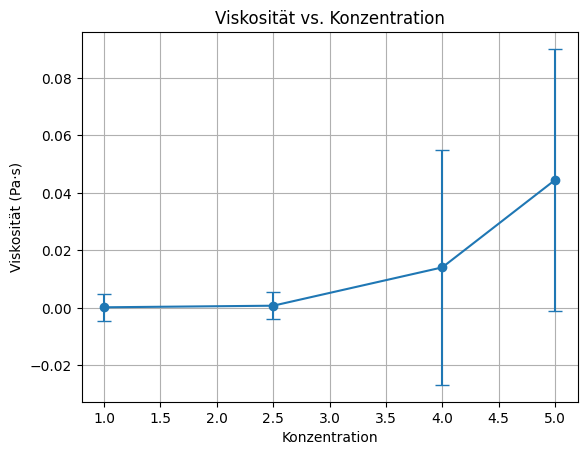

In [399]:
import matplotlib.pyplot as plt

plt.errorbar(
    df["Konzentration"],
    df["viscosity_Pa_s"],
    yerr=df["delta_viscosity_Pa_s"],
    fmt="o-",
    capsize=5
)

plt.xlabel("Konzentration")
plt.ylabel("Viskosität (Pa·s)")
plt.title("Viskosität vs. Konzentration")
plt.grid(True)

plt.show()


# Experimenting

In [400]:
# Für Kritische Konzentration
# Messung bei 60min - Expoentiell

c1 = [1, 2.5, 4, 5]
t1_B = [1.48, 4.98, 9.01, 29.1]
winkel1_deg = [45, 45, 60, 75]
strecke1_cm= [7, 7, 1, 1]

c2 = [1, 2.5, 4, 5]
t2_B = [1.26, 4.71, 11.68, 29.45]
winkel2_deg = [45, 45, 60, 75]
strecke2_cm = [7, 7, 1, 1]

In [401]:
import numpy as np
# In Arrays umwandeln
t1 = np.array(t1_B)
t2 = np.array(t2_B)
s1 = np.array(strecke1_cm)
s2 = np.array(strecke2_cm)

# Mittelwerte
t_mean = (t1 + t2) / 2
s_mean = (s1 + s2) / 2

print("Mittelwerte t_B:", t_mean)
print("Mittelwerte Strecke:", s_mean)

Mittelwerte t_B: [ 1.37   4.845 10.345 29.275]
Mittelwerte Strecke: [7. 7. 1. 1.]


In [402]:
t_error = 0.2 * t_mean

print("t_mean:", t_mean)
print("t_error (10%):", t_error)

t_mean: [ 1.37   4.845 10.345 29.275]
t_error (10%): [0.274 0.969 2.069 5.855]


In [403]:
df = pd.DataFrame({
    "Konzentration": c1,
    "Konzentration": c2,
    "Strecke_mean": s_mean,
    "t1_B": t1_B,
    "t2_B": t2_B,
    "t_mean": t_mean,
    "t_error": t_error,
    "winkel_deg": winkel1_deg
})

print(df)

   Konzentration  Strecke_mean   t1_B   t2_B  t_mean  t_error  winkel_deg
0            1.0           7.0   1.48   1.26   1.370    0.274          45
1            2.5           7.0   4.98   4.71   4.845    0.969          45
2            4.0           1.0   9.01  11.68  10.345    2.069          60
3            5.0           1.0  29.10  29.45  29.275    5.855          75


# Velocity Calc

In [404]:
def velocity_calc_mm_per_s(distance: float, time: float):
    velocity = distance/time 
    return velocity

In [405]:
def velocity_calc_error_mm_per_s(distance: float, t: float, t_error: float):
    velocity_error_mm_per_s = (distance)/(t ** 2) * t_error
    return velocity_error_mm_per_s

In [406]:
# Velocity berechnen aus den Mittelwerten
df["velocity_mm_per_s"] = df.apply(
    lambda row: velocity_calc_mm_per_s(row["Strecke_mean"], row["t_mean"]),
    axis=1
)

# Velocity-Fehler berechnen
df["velocity_error_mm_per_s"] = df.apply(
    lambda row: velocity_calc_error_mm_per_s(row["Strecke_mean"], row["t_mean"], row["t_error"]),
    axis=1
)

print(df)

   Konzentration  Strecke_mean   t1_B   t2_B  t_mean  t_error  winkel_deg  \
0            1.0           7.0   1.48   1.26   1.370    0.274          45   
1            2.5           7.0   4.98   4.71   4.845    0.969          45   
2            4.0           1.0   9.01  11.68  10.345    2.069          60   
3            5.0           1.0  29.10  29.45  29.275    5.855          75   

   velocity_mm_per_s  velocity_error_mm_per_s  
0           5.109489                 1.021898  
1           1.444788                 0.288958  
2           0.096665                 0.019333  
3           0.034159                 0.006832  


# Viscosity

In [407]:
K = 0.000583           # Korrekturfaktor
d_kugel_cm = 0.06       # cm
d_kapillare_m = 0

g = 9.81 * 100              # m/s^2
roh_water = 1          # g/cm^3
roh_kugel = 7.85       # g/cm^3 (aus Skript)

In [408]:
import math
# Durchmesser Kapillare
# Rechnung - Volumen = 100µl -> *10^-6 -> 100l -> *10^3 -> cm^3 
# Formel: V = π r^2 * h (G = Grundfläche Kreis und h = Höhe)
V = 100 # µl = 0.001 cm^3
V = V * 0.001 # cm^3
h = 9 # cm

r_kapillare_mm = math.sqrt(V/(np.pi * h))
print(f"Radius {r_kapillare_mm} cm")
        
d_kapillare_mm = r_kapillare_mm*2 
print(f"Durchmesser {d_kapillare_mm} cm")


Radius 0.05947080387175904 cm
Durchmesser 0.11894160774351809 cm


In [409]:

def viscosity_formula_mPas(K: float, roh_fluid: float, roh_shape: float,
                      angle: float, d_tube: float, d_shape: float,
                      g: float, velocity: float):
    
    numerator = (5 * math.pi / 42) * K * (d_shape ** 2) * roh_fluid * g * math.sin(math.radians(angle))
    correction = (roh_shape - roh_fluid) / roh_fluid * (d_tube + d_shape) / d_shape
    
    viscosity = numerator * correction / velocity
    return viscosity * 100

In [410]:
# Fehlerrechnung
def viscosity_error_formula_mPas(K, roh_fluid, roh_shape, angle, d_tube, d_shape, g,
                            velocity, velocity_error):
    
    numerator = (5 * math.pi / 42) * K * (d_shape ** 2) * roh_fluid * g * math.sin(math.radians(angle))
    correction = (roh_shape - roh_fluid) / roh_fluid * (d_tube + d_shape) / d_shape
    
    C = numerator * correction  # alles außer 1/v
    
    d_eta = C / (velocity ** 2) * velocity_error
    return d_eta * 100

In [411]:
# Viscosity error
df["viscosity_mPa_s"] = df.apply(
    lambda row: viscosity_formula_mPas(
        K, roh_water, roh_kugel,
        row["winkel_deg"],
        d_kapillare_mm, d_kugel_cm,
        g,
        row["velocity_mm_per_s"]
    ),
    axis=1
)
print(df)

   Konzentration  Strecke_mean   t1_B   t2_B  t_mean  t_error  winkel_deg  \
0            1.0           7.0   1.48   1.26   1.370    0.274          45   
1            2.5           7.0   4.98   4.71   4.845    0.969          45   
2            4.0           1.0   9.01  11.68  10.345    2.069          60   
3            5.0           1.0  29.10  29.45  29.275    5.855          75   

   velocity_mm_per_s  velocity_error_mm_per_s  viscosity_mPa_s  
0           5.109489                 1.021898         0.217705  
1           1.444788                 0.288958         0.769914  
2           0.096665                 0.019333        14.093616  
3           0.034159                 0.006832        44.483811  


In [412]:
# Viscosity error
df["viscosity_error_mPa_s"] = df.apply(
    lambda row: viscosity_error_formula_mPas(
        K, roh_water, roh_kugel,
        row["winkel_deg"],
        d_kapillare_mm, d_kugel_cm,
        g,
        row["velocity_mm_per_s"],
        row["velocity_error_mm_per_s"]
    ),
    axis=1
)
print(df)

   Konzentration  Strecke_mean   t1_B   t2_B  t_mean  t_error  winkel_deg  \
0            1.0           7.0   1.48   1.26   1.370    0.274          45   
1            2.5           7.0   4.98   4.71   4.845    0.969          45   
2            4.0           1.0   9.01  11.68  10.345    2.069          60   
3            5.0           1.0  29.10  29.45  29.275    5.855          75   

   velocity_mm_per_s  velocity_error_mm_per_s  viscosity_mPa_s  \
0           5.109489                 1.021898         0.217705   
1           1.444788                 0.288958         0.769914   
2           0.096665                 0.019333        14.093616   
3           0.034159                 0.006832        44.483811   

   viscosity_error_mPa_s  
0               0.043541  
1               0.153983  
2               2.818723  
3               8.896762  


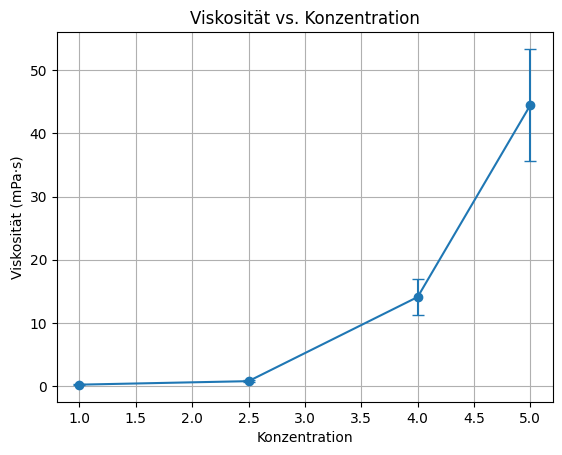

In [414]:
import matplotlib.pyplot as plt

# Plot
plt.figure()
plt.errorbar(
    df["Konzentration"],
    df["viscosity_mPa_s"],
    yerr=df["viscosity_error_mPa_s"],
    fmt="o-",
    capsize=4
)
plt.xlabel("Konzentration")
plt.ylabel("Viskosität (mPa·s)")
plt.title("Viskosität vs. Konzentration")
plt.grid(True)

plt.show()


Fitparameter:
a = 2.512233e-02 ± 7.456171e-03
b = 1.491159e+00 ± 8.482497e-02


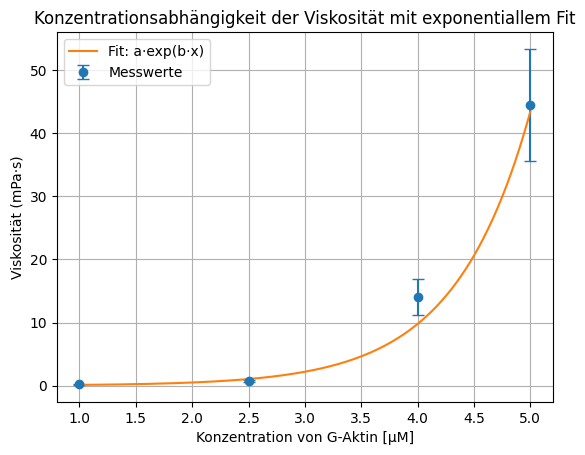

R^2 = 0.984725


In [415]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Daten
concentration = df["Konzentration"]
viscosity = df["viscosity_mPa_s"]
viscosity_err = df["viscosity_error_mPa_s"]

# Exponentialfunktion definieren
def expo(x, a, b):
    return a * np.exp(b * x)

# Fit
popt, pcov = curve_fit(expo, concentration, viscosity, sigma=viscosity_err, absolute_sigma=True)
a_fit, b_fit = popt
a_err, b_err = np.sqrt(np.diag(pcov))

print("Fitparameter:")
print(f"a = {a_fit:.6e} ± {a_err:.6e}")
print(f"b = {b_fit:.6e} ± {b_err:.6e}")

# Fitkurve erzeugen
x_fit = np.linspace(min(concentration), max(concentration), 300)
y_fit = expo(x_fit, a_fit, b_fit)

# Plot
plt.figure()
plt.errorbar(concentration, viscosity, yerr=viscosity_err, fmt="o", capsize=4, label="Messwerte")
plt.plot(x_fit, y_fit, label=f"Fit: a·exp(b·x)")

plt.xlabel("Konzentration von G-Aktin [µM]")
plt.ylabel("Viskosität (mPa·s)")
plt.title("Konzentrationsabhängigkeit der Viskosität mit exponentiallem Fit")
plt.grid(True)
plt.legend()

plt.show()

# R^2 berechnen
y_pred = expo(concentration, a_fit, b_fit)

ss_res = np.sum((viscosity - y_pred)**2)
ss_tot = np.sum((viscosity - np.mean(viscosity))**2)

r2 = 1 - (ss_res / ss_tot)

print(f"R^2 = {r2:.6f}")



Fitparameter:
a = 2.512233e-02 ± 7.456171e-03
b = 1.491159e+00 ± 8.482497e-02
R^2 = 0.984725


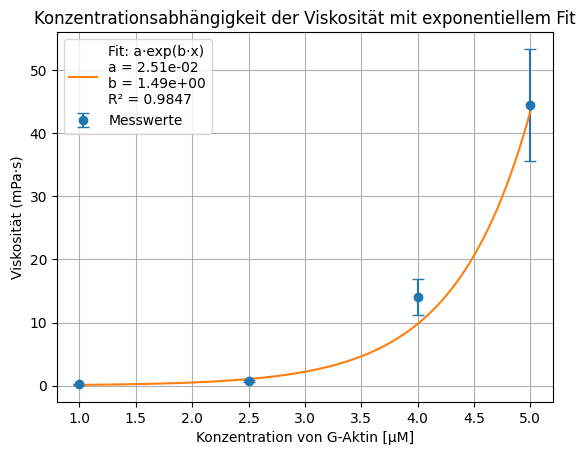

In [416]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Daten
concentration = df["Konzentration"]
viscosity = df["viscosity_mPa_s"]
viscosity_err = df["viscosity_error_mPa_s"]

# Exponentialfunktion definieren
def expo(x, a, b):
    return a * np.exp(b * x)

# Fit
popt, pcov = curve_fit(expo, concentration, viscosity, sigma=viscosity_err, absolute_sigma=True)
a_fit, b_fit = popt
a_err, b_err = np.sqrt(np.diag(pcov))

print("Fitparameter:")
print(f"a = {a_fit:.6e} ± {a_err:.6e}")
print(f"b = {b_fit:.6e} ± {b_err:.6e}")

# Fitkurve erzeugen
x_fit = np.linspace(min(concentration), max(concentration), 300)
y_fit = expo(x_fit, a_fit, b_fit)

# R^2 berechnen
y_pred = expo(concentration, a_fit, b_fit)
ss_res = np.sum((viscosity - y_pred)**2)
ss_tot = np.sum((viscosity - np.mean(viscosity))**2)
r2 = 1 - (ss_res / ss_tot)
print(f"R^2 = {r2:.6f}")

# Plot
plt.figure()

plt.errorbar(concentration, viscosity, yerr=viscosity_err,
             fmt="o", capsize=4, label="Messwerte")

# Fitparameter gerundet
a_round = float(f"{a_fit:.2e}")
b_round = float(f"{b_fit:.2e}")
r2_round = float(f"{r2:.4f}")

fit_label = (
    "Fit: a·exp(b·x)\n"
    f"a = {a_round:.2e}\n"
    f"b = {b_round:.2e}\n"
    f"R² = {r2_round:.4f}"
)


plt.plot(x_fit, y_fit, label=fit_label)

plt.xlabel("Konzentration von G-Aktin [µM]")
plt.ylabel("Viskosität (mPa·s)")
plt.title("Konzentrationsabhängigkeit der Viskosität mit exponentiellem Fit")
plt.grid(True)
plt.legend()

plt.show()
